# An Earth-Mover Distance Based Graph Distance Metric For Financial Statements

in this notebook we show how the distance between two companies represented as vertex-weighted trees can be calculated. 

*Paper*: https://pages.github.com/

If you find the code useful, please consider citing this paper.
```bibtex
@inproceedings{bibtex here
}
```

First import the necessary dependencies:

In [1]:
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pickle

import sys
sys.path.append('../')

## Load the dataset

In [2]:
with open('../data/company_graph_data.pkl','rb') as handle:
    company_graph_data = pickle.load(handle)

## Visualize the vetrex-weighted tree representation of a company

In [3]:
from src.visualization.visualize import visualize_company

The node labels represent the name of a node followed by its node weight (`node : weight`). 

Vertex-weighted tree representation of `company_graph_data[0]`:

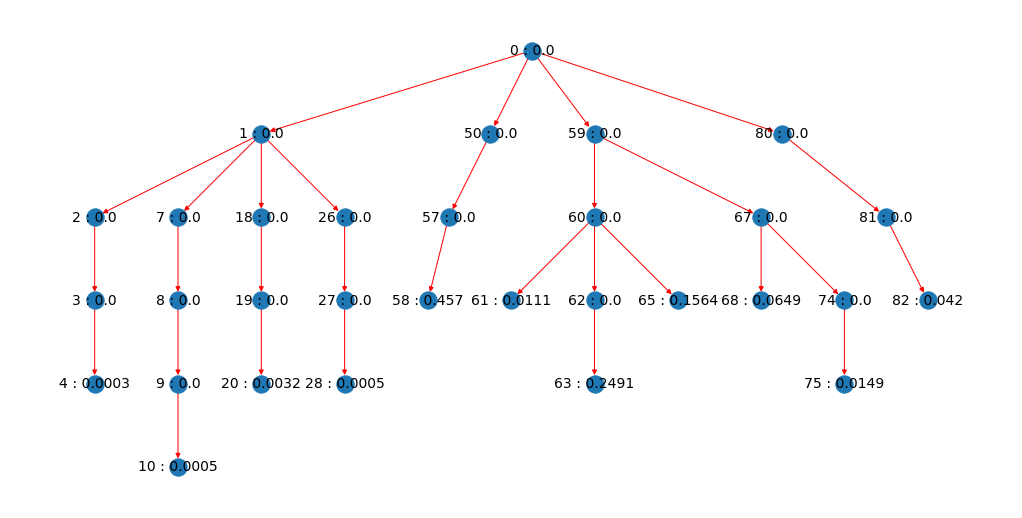

In [4]:
visualize_company(company_graph_data[0], digits = 4)

Vertex-weighted tree representation of `company_graph_data[1]`:

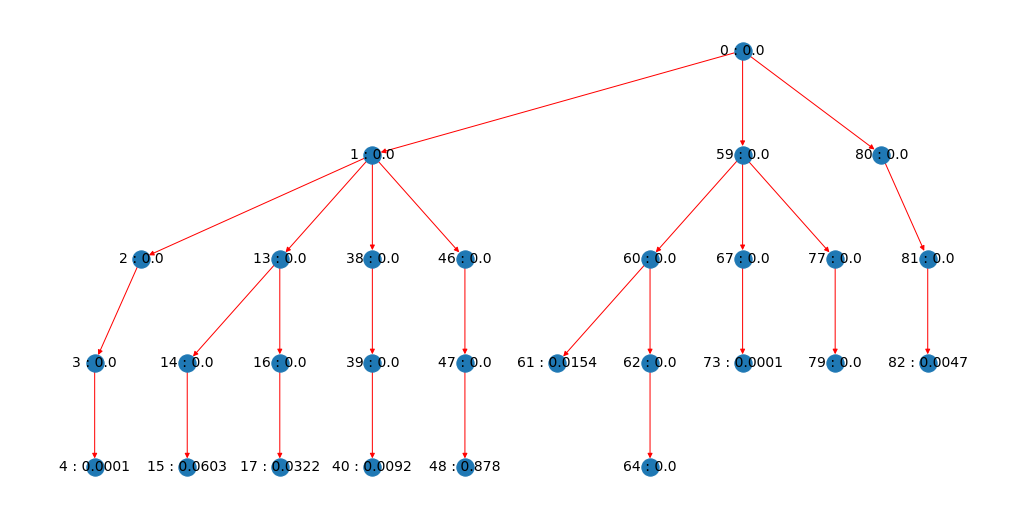

In [5]:
visualize_company(company_graph_data[1], digits = 4)

## Compute the distance between two vetrex-weighted trees

In [6]:
import src.distance.graph_distance as gd

The earth-movers distance based graph distance metric between `company_graph_data[0]` and `company_graph_data[1]` is:

In [7]:
distance = gd.compute_graph_distance(company_graph_data[0] ,company_graph_data[1])

print('The distance between the graphs is', distance.total_abs_F)

The distance between the graphs is 7.126958091571802


## Visualize the edge flows

In [8]:
from src.visualization.visualize import plot_edge_flows

The weights that have to be shifted over the edges of `company_graph_data[0]` in order to become identical to `company_graph_data[1]` can be seen on the following graph:

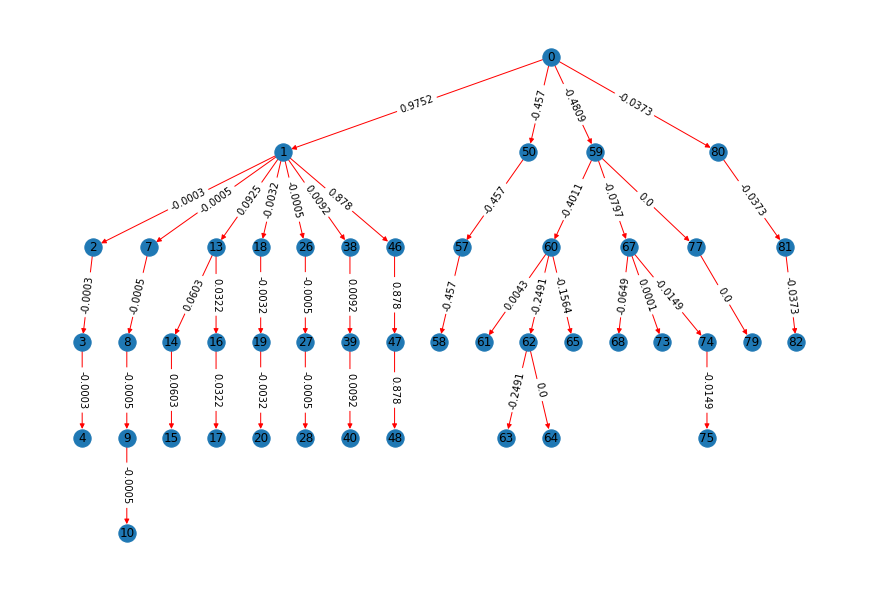

In [9]:
plot_edge_flows(company_graph_data[0] ,company_graph_data[1], distance.edges, distance.values, digits = 4)

Edges with a negative weight flow upwards, while those with a positive weight flow downwards.